In [1]:
from evo.tools import file_interface

# Convert timestamps from nanoseconds to seconds
def process_trajectory(input_file, output_file):
    traj = file_interface.read_tum_trajectory_file(input_file)
    traj.timestamps = traj.timestamps / 1e9
    file_interface.write_tum_trajectory_file(output_file, traj)

process_trajectory("f_pySLAM_EuRoC_TUM_Trajectory.txt", "pySLAM.txt")
process_trajectory("f_ORBSLAM3_EuRoC_TUM_Trajectory.txt", "ORBSLAM3.txt")

In [2]:
from evo.core import sync
from evo.tools import file_interface
import copy

def read_trajectory(filename):
    return file_interface.read_tum_trajectory_file(filename)

def align_trajectories(gt_traj, est_traj, max_diff):
    gt_traj_aligned, est_traj_aligned = sync.associate_trajectories(gt_traj, est_traj, max_diff)
    return gt_traj_aligned, est_traj_aligned

def align_trajectory_with_gt(est_traj, gt_traj):
    est_traj_aligned = copy.deepcopy(est_traj)
    est_traj_aligned.align(gt_traj, correct_scale=True, correct_only_scale=False)
    return est_traj_aligned

max_diff = 0.01

traj_orb_gt = read_trajectory("MH01_GT.tum")
traj_pyslam_gt = read_trajectory("MH01_GT.tum")

traj_pyslam = read_trajectory("pySLAM.txt")
traj_orb = read_trajectory("ORBSLAM3.txt")

traj_orb_gt, traj_orb = align_trajectories(traj_orb_gt, traj_orb, max_diff)
traj_pyslam_gt, traj_pyslam = align_trajectories(traj_pyslam_gt, traj_pyslam, max_diff)

traj_orb_aligned = align_trajectory_with_gt(traj_orb, traj_orb_gt)
traj_pyslam_aligned = align_trajectory_with_gt(traj_pyslam, traj_pyslam_gt)


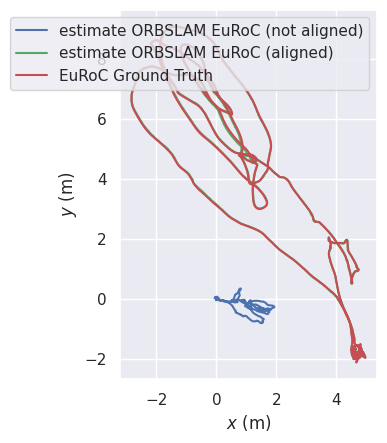

In [3]:
import matplotlib.pyplot as plt
from evo.tools import plot
from evo.tools.plot import PlotMode

# Plot the trajectories:
%matplotlib inline

fig_1 = plt.figure()
traj_orb_by_label = {
    "ORB-SLAM3 EuRoC (not aligned)": traj_orb,
    "ORB-SLAM3 EuRoC (aligned)": traj_orb_aligned,
    "EuRoC Ground Truth": traj_orb_gt
}
plot.trajectories(fig_1, traj_orb_by_label, plot.PlotMode.xy)

plt.show()

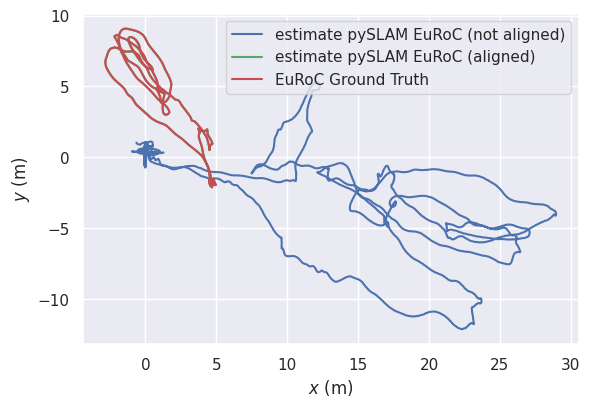

In [4]:
fig_2 = plt.figure()
traj_pyslam_by_label = {
    "pySLAM EuRoC (not aligned)": traj_pyslam,
    "pySLAM EuRoC (aligned)": traj_pyslam_aligned,
    "EuRoC Ground Truth": traj_orb_gt
}
plot.trajectories(fig_2, traj_pyslam_by_label, plot.PlotMode.xy)

plt.show()